<a href="https://colab.research.google.com/github/0su1327/Graduation_Thesis/blob/Model/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Testing One-class Autoencoder for NSL-KDD Classificiation
# Import required packages
import os
from collections import Counter

import numpy as np
import pandas as pd
import h5py

from keras.models import load_model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
# Test data
# Import test data

with h5py.File(os.path.join('..', 'hdf5', 'test.hdf5'), 'r') as hdf:
    x_test = hdf['x'][:]
    y_test = hdf['y'][:].squeeze()
print(x_test.shape)

(22544, 109)


In [ ]:
# Number of attack and normal

atk, nrm = Counter(y_test)[1], Counter(y_test)[0] # atack: 1, normal: 0
print('Attack:', atk)
print('Normal:', nrm)

Attack: 12833
Normal: 9711


In [ ]:
# List of pre-trained model

model_list = os.listdir('save')
del model_list[0]
model_list[0], model_list[1] = model_list[1], model_list[0]
model_list[2], model_list[3] = model_list[3], model_list[2]
model_list[4], model_list[5] = model_list[5], model_list[4]
# model_list[2], model_list[3] = model_list[3], model_list[2]
model_list.sort
for i in model_list:
    print(i)

get_denoising_autoencoder_binary_crossentropy_normal.h5
get_denoising_autoencoder_binary_crossentropy_mix.h5
get_sparse_autoencoder_binary_crossentropy_normal.h5
get_sparse_autoencoder_binary_crossentropy_mix.h5
get_stacked_autoencoder_binary_crossentropy_normal.h5
get_stacked_autoencoder_binary_crossentropy_mix.h5


In [ ]:
# Test each model
# L1 norm caculation (Reconstruction error)
def l1_norm(a, b):
    return np.sum(np.abs(a - b), axis=1)

In [ ]:
# Test each model and calculate L1 norm

l1_norms = dict()
for m in model_list:
    model = load_model(os.path.join('save', m))
    x_recons = model.predict(x_test) # recons : 재구성 손실
    l1_norms[m] = l1_norm(x_test, x_recons)
    print('Predicting with model', m, '...')

705/705 [==============================] - 2s 2ms/step
Predicting with model get_denoising_autoencoder_binary_crossentropy_normal.h5 ...
705/705 [==============================] - 2s 2ms/step
Predicting with model get_denoising_autoencoder_binary_crossentropy_mix.h5 ...
705/705 [==============================] - 1s 2ms/step
Predicting with model get_sparse_autoencoder_binary_crossentropy_normal.h5 ...
705/705 [==============================] - 2s 2ms/step
Predicting with model get_sparse_autoencoder_binary_crossentropy_mix.h5 ...
705/705 [==============================] - 2s 2ms/step
Predicting with model get_stacked_autoencoder_binary_crossentropy_normal.h5 ...
705/705 [==============================] - 2s 2ms/step
Predicting with model get_stacked_autoencoder_binary_crossentropy_mix.h5 ...


In [ ]:
print(len(l1_norms['get_denoising_autoencoder_binary_crossentropy_normal.h5']))
print(l1_norms['get_denoising_autoencoder_binary_crossentropy_normal.h5'])
print(l1_norms['get_denoising_autoencoder_binary_crossentropy_normal.h5'][0])
print(l1_norms)

22544
[4.83504161 4.7389207  1.25204241 ... 1.25392452 0.40071208 6.15025586]
4.835041610897679
{'get_denoising_autoencoder_binary_crossentropy_normal.h5': array([4.83504161, 4.7389207 , 1.25204241, ..., 1.25392452, 0.40071208,
       6.15025586]), 'get_denoising_autoencoder_binary_crossentropy_mix.h5': array([1.77397585, 1.7020479 , 1.05813582, ..., 1.24481351, 0.271634  ,
       5.42819829]), 'get_sparse_autoencoder_binary_crossentropy_normal.h5': array([10.43158139, 10.50162139,  2.65865628, ...,  2.06623363,
        1.73142073, 10.2541805 ]), 'get_sparse_autoencoder_binary_crossentropy_mix.h5': array([7.12363237, 7.04883575, 3.11017193, ..., 2.55316584, 1.26692253,
       8.09332252]), 'get_stacked_autoencoder_binary_crossentropy_normal.h5': array([7.81957928, 7.63631076, 3.95245523, ..., 2.04984776, 1.65939001,
       9.47145891]), 'get_stacked_autoencoder_binary_crossentropy_mix.h5': array([7.5833662 , 7.41106286, 2.65477435, ..., 2.40380313, 1.44961282,
       9.19228385])}


In [ ]:
# ROC curve
sns.set(style='whitegrid', rc={"grid.linewidth": 0.5, 'grid.linestyle': '--'})
linestyle_list = ['-', '--', '-.', ':', '-', '--']
bce_str = 'BCE '
legend_list = [bce_str + '+ Denoising Train A(normal)', bce_str + '+ Denoising  Train B(mix)',
               bce_str + '+ Sparse Train A(normal)', bce_str + '+ Sparse  Train B(mix)',
               bce_str + '+ Stacked Train A(normal)', bce_str + '+ Stacked  Train B(mix)']
plt.figure(dpi=80)
legend_list

['BCE + Denoising Train A(normal)',
 'BCE + Denoising  Train B(mix)',
 'BCE + Sparse Train A(normal)',
 'BCE + Sparse  Train B(mix)',
 'BCE + Stacked Train A(normal)',
 'BCE + Stacked  Train B(mix)']

<Figure size 480x320 with 0 Axes>

get_denoising_autoencoder_binary_crossentropy_normal.h5
get_sparse_autoencoder_binary_crossentropy_normal.h5
get_stacked_autoencoder_binary_crossentropy_normal.h5


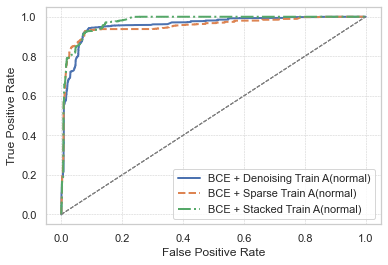

In [ ]:
# 전체 피처로 출력한거
# Plot ROC curve for each model
normal_legend_list = [bce_str + '+ Denoising Train A(normal)', bce_str + '+ Sparse Train A(normal)', bce_str + '+ Stacked Train A(normal)']
mixed_legend_list = [bce_str + '+ Denoising Train A(mix)', bce_str + '+ Sparse Train A(mix)', bce_str + '+ Stacked Train A(mix)']
normal_model_list = [model_list[0], model_list[2], model_list[4]]
mixed_model_list = [model_list[1], model_list[3], model_list[5]]

fprs, tprs, thresholds = dict(), dict(), dict() # 거짓양성비율, 실제양성비율, 임계치
for i, m in enumerate(normal_model_list):
    print(m)
    fpr, tpr, threshold = metrics.roc_curve(y_test, l1_norms[m], drop_intermediate=False)
    fprs[m], tprs[m], thresholds[m] = fpr, tpr, threshold
    plt.plot(fpr, tpr, linestyle=linestyle_list[i], lw=2)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='_nolegend_')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(linestyle='--')
    plt.legend(normal_legend_list, loc='lower right')

#     print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")
#     print(len(fpr))
#     for i in range(len(fpr)):
#         print(f"FPR: {fpr[i]}, TPR: {tpr[i]}, Threshold: {threshold[i]}")
#     break

get_denoising_autoencoder_binary_crossentropy_mix.h5
get_sparse_autoencoder_binary_crossentropy_mix.h5
get_stacked_autoencoder_binary_crossentropy_mix.h5


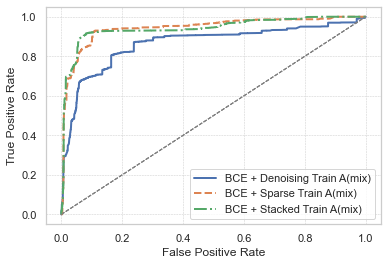

In [ ]:
fprs, tprs, thresholds = dict(), dict(), dict() # 거짓양성비율, 실제양성비율, 임계치
for i, m in enumerate(mixed_model_list):
    print(m)
    fpr, tpr, threshold = metrics.roc_curve(y_test, l1_norms[m], drop_intermediate=False)
    fprs[m], tprs[m], thresholds[m] = fpr, tpr, threshold
    plt.plot(fpr, tpr, linestyle=linestyle_list[i], lw=2)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='_nolegend_')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(linestyle='--')
    plt.legend(mixed_legend_list, loc='lower right')


get_denoising_autoencoder_binary_crossentropy_normal.h5
FPR: [0.         0.         0.         ... 0.98280301 0.99433632 1.        ], TPR: [0.00000000e+00 7.79241019e-05 1.55848204e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00], Threshold: [8.23019876e+00 7.23019876e+00 7.22814957e+00 ... 4.07507510e-03
 3.99965190e-03 2.60093027e-03]
5233
FPR: 0.0, TPR: 0.0, Threshold: 8.2301987647661
FPR: 0.0, TPR: 7.792410192472531e-05, Threshold: 7.230198764766101
FPR: 0.0, TPR: 0.00015584820384945063, Threshold: 7.228149566537468
FPR: 0.0, TPR: 0.00023377230577417596, Threshold: 7.130559834069572
FPR: 0.0, TPR: 0.00031169640769890126, Threshold: 7.082775591203244
FPR: 0.0, TPR: 0.0003896205096236266, Threshold: 7.0552158009959385
FPR: 0.0, TPR: 0.0005454687134730772, Threshold: 7.02685953018954
FPR: 0.0, TPR: 0.0006233928153978025, Threshold: 6.955254812928615
FPR: 0.0, TPR: 0.0007013169173225278, Threshold: 6.800649609183893
FPR: 0.0, TPR: 0.0007792410192472532, Threshold: 6.7924768539378

FPR: 0.00978272062609412, TPR: 0.5260656120938206, Threshold: 1.4970330426913279
FPR: 0.00978272062609412, TPR: 0.5265331567053689, Threshold: 1.4961308412348444
FPR: 0.00978272062609412, TPR: 0.5266110808072937, Threshold: 1.4889350887505088
FPR: 0.009885696632684585, TPR: 0.5266110808072937, Threshold: 1.487004133069263
FPR: 0.009885696632684585, TPR: 0.5267669290111432, Threshold: 1.4684925889123406
FPR: 0.009885696632684585, TPR: 0.5268448531130678, Threshold: 1.4629611331374122
FPR: 0.009885696632684585, TPR: 0.5269227772149926, Threshold: 1.455366661943117
FPR: 0.009885696632684585, TPR: 0.5270007013169173, Threshold: 1.4425228083346155
FPR: 0.009885696632684585, TPR: 0.5270786254188421, Threshold: 1.4390055577741805
FPR: 0.009885696632684585, TPR: 0.5272344736226915, Threshold: 1.4292477419148781
FPR: 0.009988672639275048, TPR: 0.5273123977246162, Threshold: 1.4277909788346506
FPR: 0.009988672639275048, TPR: 0.527390321826541, Threshold: 1.4165859826789529
FPR: 0.009988672639275

FPR: 0.1499330655957162, TPR: 0.9359463882178758, Threshold: 0.14211474164783358
FPR: 0.15003604160230666, TPR: 0.9359463882178758, Threshold: 0.14210647784621927
FPR: 0.15013901760889714, TPR: 0.9359463882178758, Threshold: 0.1420578606755054
FPR: 0.1502419936154876, TPR: 0.9359463882178758, Threshold: 0.1420517228733722
FPR: 0.15034496962207805, TPR: 0.9359463882178758, Threshold: 0.14182087259761356
FPR: 0.15044794562866853, TPR: 0.9359463882178758, Threshold: 0.14178747660536517
FPR: 0.150550921635259, TPR: 0.9359463882178758, Threshold: 0.1417865758999716
FPR: 0.15075687364843993, TPR: 0.9359463882178758, Threshold: 0.14162679077257595
FPR: 0.15096282566162084, TPR: 0.9359463882178758, Threshold: 0.14160949276185136
FPR: 0.15106580166821132, TPR: 0.9359463882178758, Threshold: 0.1416068303379068
FPR: 0.15127175368139223, TPR: 0.9359463882178758, Threshold: 0.14157110658833783
FPR: 0.1513747296879827, TPR: 0.9359463882178758, Threshold: 0.1414214712852597
FPR: 0.1513747296879827, T

FPR: 0.7436927195963341, TPR: 0.9876879918958934, Threshold: 0.03327318604019994
FPR: 0.7437956956029245, TPR: 0.9876879918958934, Threshold: 0.0332706488006761
FPR: 0.743898671609515, TPR: 0.9876879918958934, Threshold: 0.033253687369067614
FPR: 0.7440016476161054, TPR: 0.9876879918958934, Threshold: 0.03292854024594477
FPR: 0.7448254556688292, TPR: 0.9876879918958934, Threshold: 0.032916461282500226
FPR: 0.7455462877149625, TPR: 0.9876879918958934, Threshold: 0.03285210331556079
FPR: 0.7456492637215528, TPR: 0.9876879918958934, Threshold: 0.03284201199672496
FPR: 0.7462671197610956, TPR: 0.9876879918958934, Threshold: 0.03276058018525582
FPR: 0.7472968798270003, TPR: 0.9876879918958934, Threshold: 0.03264653259938703
FPR: 0.7475028318401813, TPR: 0.9876879918958934, Threshold: 0.03257856861601216
FPR: 0.7483266398929049, TPR: 0.9876879918958934, Threshold: 0.032507133442839856
FPR: 0.7492534239522192, TPR: 0.9876879918958934, Threshold: 0.03250072979642049
FPR: 0.7494593759654, TPR: 

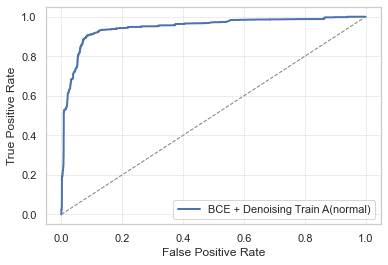

In [ ]:
# PI + Drop_Columns로 출력한거
# Plot ROC curve for each model
fprs, tprs, thresholds = dict(), dict(), dict() # 거짓양성비율, 실제양성비율, 임계치
for i, m in enumerate(model_list):
    print(m)
    fpr, tpr, threshold = metrics.roc_curve(y_test, l1_norms[m], drop_intermediate=False)
    fprs[m], tprs[m], thresholds[m] = fpr, tpr, threshold
    plt.plot(fpr, tpr, linestyle=linestyle_list[i], lw=2)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='_nolegend_')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(linestyle='--')
    plt.legend(legend_list, loc='lower right')

#     print(f"FPR: {fpr}, TPR: {tpr}, Threshold: {threshold}")
#     print(len(fpr))
#     for i in range(len(fpr)):
#         print(f"FPR: {fpr[i]}, TPR: {tpr[i]}, Threshold: {threshold[i]}")
#     break

In [ ]:
# 전체 피처로 돌린거
# AUC(Area Under Curve)
auc_list = list()
for m in model_list:
    auc_list.append(metrics.auc(fprs[m], tprs[m]))

auc_list
df = pd.DataFrame({'AUC': auc_list})
df.index = legend_list
df = df.round(3)
df

,AUC
BCE + Denoising Train A(normal),0.968
BCE + Denoising Train B(mix),0.928
BCE + Sparse Train A(normal),0.972
BCE + Sparse Train B(mix),0.964
BCE + Stacked Train A(normal),0.966
BCE + Stacked Train B(mix),0.955


In [ ]:
# PI + Drop_Columns로 출력한거
# AUC(Area Under Curve)
auc_list = list()
for m in model_list:
    auc_list.append(metrics.auc(fprs[m], tprs[m]))

auc_list
df = pd.DataFrame({'AUC': auc_list})
df.index = legend_list
df = df.round(3)
df

,AUC
BCE + Denoising Train A(normal),0.946
BCE + Denoising Train B(mix),0.878
BCE + Sparse Train A(normal),0.969
BCE + Sparse Train B(mix),0.947
BCE + Stacked Train A(normal),0.957
BCE + Stacked Train B(mix),0.938


In [ ]:
for m in model_list:
    fpr_, tpr_, thr_ = fprs[m], tprs[m], thresholds[m]
    print(len(tpr_[np.where(tpr_ >= 0.9)]))
    print(tpr_[np.where(tpr_ >= 0.9)])
    print(tpr_[np.where(tpr_ >= 0.9)][0])
    print(np.where(tpr_ >= 0.9)[0][0])
    break

9827
[0.90002338 0.9001013  0.90017923 ... 1.         1.         1.        ]
0.9000233772305775
12534


In [ ]:
# Performance table
# Performance table calculation
df_dict = dict()
for m in model_list:
    fpr_, tpr_, thr_ = fprs[m], tprs[m], thresholds[m]
    tpr, fpr, acc, rec, pre, spe, f1, thr = [list() for i in range(8)]
    for r in range(90, 100):
        r *= 0.01
        tpr.append(tpr_[np.where(tpr_ >= r)[0][0]])
        fpr.append(fpr_[np.where(tpr_ >= r)[0][0]])
        acc.append((tpr[-1] * atk + (1 - fpr[-1]) * nrm) / (atk + nrm))
        rec.append(tpr[-1])
        pre.append(tpr[-1] * atk / (tpr[-1] * atk + fpr[-1] * nrm))
        spe.append(1 - fpr[-1])
        f1.append(2 * rec[-1] * pre[-1] / (rec[-1] + pre[-1]))
        thr.append(thr_[np.where(tpr_ >= r)[0][0]])
    df = pd.DataFrame({
        'TPR' : tpr, 'FPR': fpr, 'Threshold': thr, 'Accuracy': acc,
        'Specifity': spe, 'Precision': pre, 'Recall': rec, 'F1-score': f1
    })
    df = df.round(3)
    df_dict[m] = df.copy()

    df.to_csv(os.path.join('perf', m[:-3] + '.csv'), index=False)

In [ ]:
# Data frame settings
subset = ['Accuracy', 'F1-score']

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
# PI + Drop_Columns 로 돌린거
model_name = ["denoising_autoencoder(normal)", "denoising_autoencoder(mix)",
              "sparse_autoencoder(normal)", "sparse_autoencoder(mix)",
              "stacked_autoencoder(normal)", "stacked_autoencoder(mix)"]

for idx, name in enumerate(model_name):
    print(f"Model : {name}")
    display(df_dict[model_list[idx]].style.hide_index().apply(highlight_max, subset=subset).format('{:.3f}'))
#     df_dict[model_list[idx]].style.hide_index().apply(highlight_max, subset=subset).format('{:.3f}')


Model : denoising_autoencoder(normal)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.903,0.083,0.180,0.909,0.917,0.935,0.903,0.919
0.910,0.097,0.164,0.907,0.903,0.926,0.910,0.918
0.920,0.116,0.152,0.905,0.884,0.913,0.920,0.917
0.932,0.126,0.145,0.907,0.874,0.907,0.932,0.919
0.941,0.182,0.137,0.888,0.818,0.873,0.941,0.905
0.951,0.263,0.113,0.859,0.737,0.827,0.951,0.885
0.963,0.374,0.094,0.818,0.626,0.773,0.963,0.858
0.971,0.490,0.070,0.773,0.510,0.724,0.971,0.829
0.983,0.555,0.060,0.751,0.445,0.700,0.983,0.818
0.993,0.863,0.020,0.624,0.137,0.603,0.993,0.751


Model : denoising_autoencoder(mix)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.900,0.289,0.089,0.819,0.711,0.805,0.900,0.850
0.910,0.454,0.068,0.754,0.546,0.726,0.910,0.808
0.927,0.685,0.042,0.663,0.315,0.641,0.927,0.758
0.935,0.863,0.025,0.591,0.137,0.589,0.935,0.723
0.944,0.884,0.023,0.587,0.116,0.585,0.944,0.722
0.962,0.963,0.015,0.564,0.037,0.569,0.962,0.715
0.962,0.963,0.015,0.564,0.037,0.569,0.962,0.715
0.975,0.977,0.013,0.565,0.023,0.569,0.975,0.718
0.993,0.996,0.006,0.567,0.004,0.569,0.993,0.723
0.993,0.996,0.006,0.567,0.004,0.569,0.993,0.723


Model : sparse_autoencoder(normal)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.901,0.104,0.694,0.899,0.896,0.920,0.901,0.910
0.910,0.116,0.660,0.899,0.884,0.912,0.910,0.911
0.929,0.116,0.655,0.909,0.884,0.913,0.929,0.921
0.935,0.118,0.646,0.912,0.882,0.913,0.935,0.924
0.941,0.120,0.613,0.914,0.880,0.912,0.941,0.926
0.951,0.127,0.603,0.918,0.873,0.908,0.951,0.929
0.961,0.160,0.596,0.909,0.840,0.888,0.961,0.923
0.970,0.184,0.551,0.904,0.816,0.875,0.970,0.920
0.984,0.210,0.515,0.900,0.790,0.861,0.984,0.918
0.991,0.217,0.446,0.901,0.783,0.858,0.991,0.919


Model : sparse_autoencoder(mix)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.904,0.079,0.299,0.912,0.921,0.938,0.904,0.921
0.916,0.080,0.293,0.918,0.920,0.938,0.916,0.927
0.920,0.081,0.288,0.920,0.919,0.938,0.920,0.929
0.930,0.093,0.214,0.920,0.907,0.930,0.930,0.930
0.941,0.236,0.115,0.865,0.764,0.840,0.941,0.888
0.951,0.276,0.109,0.853,0.724,0.820,0.951,0.881
0.960,0.311,0.104,0.844,0.689,0.803,0.960,0.875
0.974,0.441,0.091,0.795,0.559,0.745,0.974,0.844
0.980,0.520,0.081,0.765,0.480,0.714,0.980,0.826
0.999,0.887,0.025,0.617,0.113,0.598,0.999,0.748


Model : stacked_autoencoder(normal)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.903,0.067,0.548,0.916,0.933,0.947,0.903,0.925
0.915,0.069,0.535,0.922,0.931,0.946,0.915,0.930
0.920,0.071,0.499,0.924,0.929,0.945,0.920,0.933
0.930,0.089,0.382,0.922,0.911,0.933,0.930,0.932
0.941,0.281,0.117,0.845,0.719,0.816,0.941,0.874
0.950,0.324,0.109,0.832,0.676,0.795,0.950,0.866
0.960,0.340,0.105,0.831,0.660,0.789,0.960,0.866
0.970,0.440,0.095,0.793,0.560,0.744,0.970,0.842
0.980,0.549,0.076,0.752,0.451,0.702,0.980,0.818
0.992,0.650,0.061,0.715,0.350,0.668,0.992,0.799


Model : stacked_autoencoder(mix)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.910,0.129,0.148,0.893,0.871,0.903,0.910,0.907
0.910,0.131,0.146,0.892,0.869,0.902,0.910,0.906
0.929,0.135,0.143,0.901,0.865,0.901,0.929,0.915
0.932,0.160,0.129,0.892,0.840,0.885,0.932,0.908
0.940,0.328,0.098,0.825,0.672,0.791,0.940,0.859
0.951,0.410,0.088,0.795,0.590,0.754,0.951,0.841
0.960,0.486,0.080,0.768,0.514,0.723,0.960,0.825
0.970,0.658,0.056,0.700,0.342,0.661,0.970,0.786
0.981,0.729,0.046,0.675,0.271,0.640,0.981,0.775
0.990,0.786,0.040,0.656,0.214,0.625,0.990,0.766


In [ ]:
# 전체 피처로 돌린거
model_name = ["denoising_autoencoder(normal)", "denoising_autoencoder(mix)",
              "sparse_autoencoder(normal)", "sparse_autoencoder(mix)",
              "stacked_autoencoder(normal)", "stacked_autoencoder(mix)"]

for idx, name in enumerate(model_name):
    print(f"Model : {name}")
    display(df_dict[model_list[idx]].style.hide_index().apply(highlight_max, subset=subset).format('{:.3f}'))
#     df_dict[model_list[idx]].style.hide_index().apply(highlight_max, subset=subset).format('{:.3f}')


Model : denoising_autoencoder(normal)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.900,0.117,1.478,0.893,0.883,0.911,0.900,0.905
0.910,0.119,1.435,0.897,0.881,0.910,0.910,0.910
0.920,0.123,1.373,0.901,0.877,0.908,0.920,0.914
0.930,0.126,1.311,0.906,0.874,0.907,0.930,0.918
0.940,0.130,1.247,0.910,0.870,0.905,0.940,0.922
0.950,0.134,1.187,0.914,0.866,0.903,0.950,0.926
0.960,0.143,1.066,0.916,0.857,0.899,0.960,0.928
0.970,0.150,0.989,0.919,0.850,0.896,0.970,0.931
0.980,0.154,0.938,0.922,0.846,0.894,0.980,0.935
0.990,0.161,0.888,0.925,0.839,0.890,0.990,0.938


Model : denoising_autoencoder(mix)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.900,0.146,1.020,0.880,0.854,0.891,0.900,0.895
0.910,0.155,0.933,0.882,0.845,0.886,0.910,0.898
0.920,0.160,0.895,0.886,0.840,0.884,0.920,0.902
0.930,0.165,0.860,0.889,0.835,0.882,0.930,0.905
0.940,0.170,0.824,0.893,0.830,0.879,0.940,0.909
0.950,0.176,0.781,0.896,0.824,0.877,0.950,0.912
0.960,0.182,0.747,0.899,0.818,0.874,0.960,0.915
0.970,0.190,0.717,0.901,0.810,0.871,0.970,0.918
0.980,0.205,0.665,0.900,0.795,0.863,0.980,0.918
0.990,0.234,0.582,0.894,0.766,0.848,0.990,0.914


Model : sparse_autoencoder(normal)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.900,0.114,3.096,0.894,0.886,0.913,0.900,0.906
0.910,0.119,2.969,0.898,0.881,0.910,0.910,0.910
0.920,0.125,2.827,0.901,0.875,0.907,0.920,0.913
0.930,0.132,2.700,0.903,0.868,0.903,0.930,0.916
0.940,0.137,2.645,0.907,0.863,0.901,0.940,0.920
0.950,0.143,2.599,0.910,0.857,0.898,0.950,0.923
0.960,0.164,2.351,0.907,0.836,0.885,0.960,0.921
0.970,0.176,2.177,0.907,0.824,0.879,0.970,0.923
0.980,0.181,2.110,0.911,0.819,0.878,0.980,0.926
0.990,0.188,2.024,0.913,0.812,0.874,0.990,0.928


Model : sparse_autoencoder(mix)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.900,0.109,2.889,0.896,0.891,0.916,0.900,0.908
0.910,0.116,2.756,0.899,0.884,0.912,0.910,0.911
0.920,0.121,2.670,0.902,0.879,0.909,0.920,0.915
0.930,0.130,2.540,0.904,0.870,0.904,0.930,0.917
0.940,0.137,2.426,0.907,0.863,0.900,0.940,0.920
0.950,0.150,2.286,0.907,0.850,0.894,0.950,0.921
0.960,0.162,2.167,0.908,0.838,0.887,0.960,0.922
0.970,0.179,2.044,0.906,0.821,0.877,0.970,0.921
0.980,0.300,1.608,0.860,0.700,0.812,0.980,0.888
0.990,0.384,1.522,0.829,0.616,0.773,0.990,0.868


Model : stacked_autoencoder(normal)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.900,0.104,2.983,0.898,0.896,0.920,0.900,0.910
0.910,0.113,2.729,0.900,0.887,0.914,0.910,0.912
0.920,0.127,2.459,0.900,0.873,0.906,0.920,0.913
0.930,0.145,2.283,0.898,0.855,0.895,0.930,0.912
0.940,0.160,2.131,0.897,0.840,0.886,0.940,0.912
0.950,0.169,2.060,0.899,0.831,0.882,0.950,0.915
0.960,0.199,1.922,0.891,0.801,0.864,0.960,0.910
0.970,0.290,1.565,0.858,0.710,0.816,0.970,0.886
0.980,0.334,1.379,0.845,0.666,0.795,0.980,0.878
0.990,0.341,1.350,0.847,0.659,0.793,0.990,0.881


Model : stacked_autoencoder(mix)


TPR,FPR,Threshold,Accuracy,Specifity,Precision,Recall,F1-score
0.900,0.110,2.672,0.896,0.890,0.915,0.900,0.908
0.910,0.115,2.552,0.899,0.885,0.913,0.910,0.911
0.920,0.117,2.474,0.904,0.883,0.912,0.920,0.916
0.930,0.120,2.409,0.909,0.880,0.911,0.930,0.921
0.940,0.128,2.304,0.911,0.872,0.907,0.940,0.923
0.950,0.140,2.128,0.911,0.860,0.899,0.950,0.924
0.960,0.155,1.972,0.910,0.845,0.891,0.960,0.924
0.970,0.264,1.563,0.869,0.736,0.829,0.970,0.894
0.980,0.710,0.898,0.683,0.290,0.646,0.980,0.779
0.990,0.756,0.843,0.669,0.244,0.634,0.990,0.773


In [ ]:
#  PI + Drop_Columns로 돌린결과
for idx, name in enumerate(model_name):
    m = model_list[idx]
    recons_err = np.copy(l1_norms[m])
    label = np.copy(y_test)

    idx = np.argsort(recons_err)[::-1]
    recons_err = recons_err[idx]
    label = label[idx]

    rate = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

    pre, rec, thr = list(), list(), list()
    for r in rate:
        last = int(r * len(recons_err))
        recons_err_ = recons_err[:last]
        label_ = label[:last]
        tn, fp, fn, tp = metrics.confusion_matrix(label_, [1]*len(label_), labels=[0, 1]).ravel()
        pre.append(tp / (tp + fp))
        rec.append(tp / (tp + tn))
        thr.append(recons_err_[last-1])

    df = pd.DataFrame({
        'Top rate': [100 * r for r in rate], 'Threshold': thr,
        'Precision': pre, 'Recall': rec
    })
    df = df.round(3)
    print(f"Model : {name}", end="")
    display(df.style.hide_index().format('{:.3f}').format('{}%', subset='Top rate'))
    print(end="\n\n\n")

In [ ]:
# 전체 피처로 돌린결과
for idx, name in enumerate(model_name):
    m = model_list[idx]
    recons_err = np.copy(l1_norms[m])
    label = np.copy(y_test)

    idx = np.argsort(recons_err)[::-1]
    recons_err = recons_err[idx]
    label = label[idx]

    rate = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

    pre, rec, thr = list(), list(), list()
    for r in rate:
        last = int(r * len(recons_err))
        recons_err_ = recons_err[:last]
        label_ = label[:last]
        tn, fp, fn, tp = metrics.confusion_matrix(label_, [1]*len(label_), labels=[0, 1]).ravel()
        pre.append(tp / (tp + fp))
        rec.append(tp / (tp + tn))
        thr.append(recons_err_[last-1])

    df = pd.DataFrame({
        'Top rate': [100 * r for r in rate], 'Threshold': thr,
        'Precision': pre, 'Recall': rec
    })
    df = df.round(3)
    print(f"Model : {name}", end="")
    display(df.style.hide_index().format('{:.3f}').format('{}%', subset='Top rate'))
    print(end="\n\n\n")

Model : denoising_autoencoder(normal)

Top rate,Threshold,Precision,Recall
0.1%,13.146,1.000,1.000
1.0%,10.521,0.996,1.000
5.0%,9.701,0.998,1.000
10.0%,8.967,0.993,1.000
15.0%,7.769,0.988,1.000
20.0%,6.799,0.989,1.000
25.0%,6.338,0.990,1.000
30.0%,6.076,0.991,1.000
35.0%,5.695,0.992,1.000
40.0%,4.426,0.977,1.000





Model : denoising_autoencoder(mix)

Top rate,Threshold,Precision,Recall
0.1%,10.012,1.000,1.000
1.0%,8.988,0.996,1.000
5.0%,7.434,0.985,1.000
10.0%,5.903,0.975,1.000
15.0%,5.053,0.968,1.000
20.0%,4.457,0.949,1.000
25.0%,4.171,0.936,1.000
30.0%,3.787,0.900,1.000
35.0%,3.193,0.907,1.000
40.0%,2.950,0.914,1.000





Model : sparse_autoencoder(normal)

Top rate,Threshold,Precision,Recall
0.1%,14.240,1.000,1.000
1.0%,13.125,0.978,1.000
5.0%,12.837,0.995,1.000
10.0%,11.745,0.991,1.000
15.0%,11.090,0.991,1.000
20.0%,10.889,0.992,1.000
25.0%,10.672,0.992,1.000
30.0%,10.191,0.992,1.000
35.0%,8.729,0.988,1.000
40.0%,7.067,0.984,1.000





Model : sparse_autoencoder(mix)

Top rate,Threshold,Precision,Recall
0.1%,13.139,1.000,1.000
1.0%,12.226,0.987,1.000
5.0%,11.717,0.996,1.000
10.0%,10.368,0.995,1.000
15.0%,8.606,0.982,1.000
20.0%,7.648,0.976,1.000
25.0%,7.195,0.976,1.000
30.0%,6.487,0.972,1.000
35.0%,6.049,0.935,1.000
40.0%,5.513,0.917,1.000





Model : stacked_autoencoder(normal)

Top rate,Threshold,Precision,Recall
0.1%,14.242,1.000,1.000
1.0%,13.601,0.991,1.000
5.0%,12.520,0.987,1.000
10.0%,11.838,0.987,1.000
15.0%,10.499,0.983,1.000
20.0%,9.374,0.982,1.000
25.0%,9.032,0.985,1.000
30.0%,8.676,0.986,1.000
35.0%,7.914,0.986,1.000
40.0%,6.751,0.984,1.000





Model : stacked_autoencoder(mix)

Top rate,Threshold,Precision,Recall
0.1%,12.675,1.000,1.000
1.0%,12.179,1.000,1.000
5.0%,10.088,0.980,1.000
10.0%,9.594,0.978,1.000
15.0%,8.853,0.980,1.000
20.0%,8.104,0.979,1.000
25.0%,6.952,0.978,1.000
30.0%,6.397,0.979,1.000
35.0%,6.126,0.978,1.000
40.0%,5.901,0.971,1.000
